In [4]:
execfile('slow_analy_head.py')


2017-05-26 05:08:36


In [13]:
def sf_generator(avg, std, leng):
  assert len(avg)==len(std)
  x=zeros([len(avg), leng])
  for i in rlen(avg):
    x[i,:]=np.random.normal(avg[i], std[i], leng)
  return x

In [21]:
# to compute the included angle
def iang(u,v):
    return degrees(arccos(clip(dot(1.0*u/norm(u), 1.0*v/norm(v)), -1.0, 1.0)))

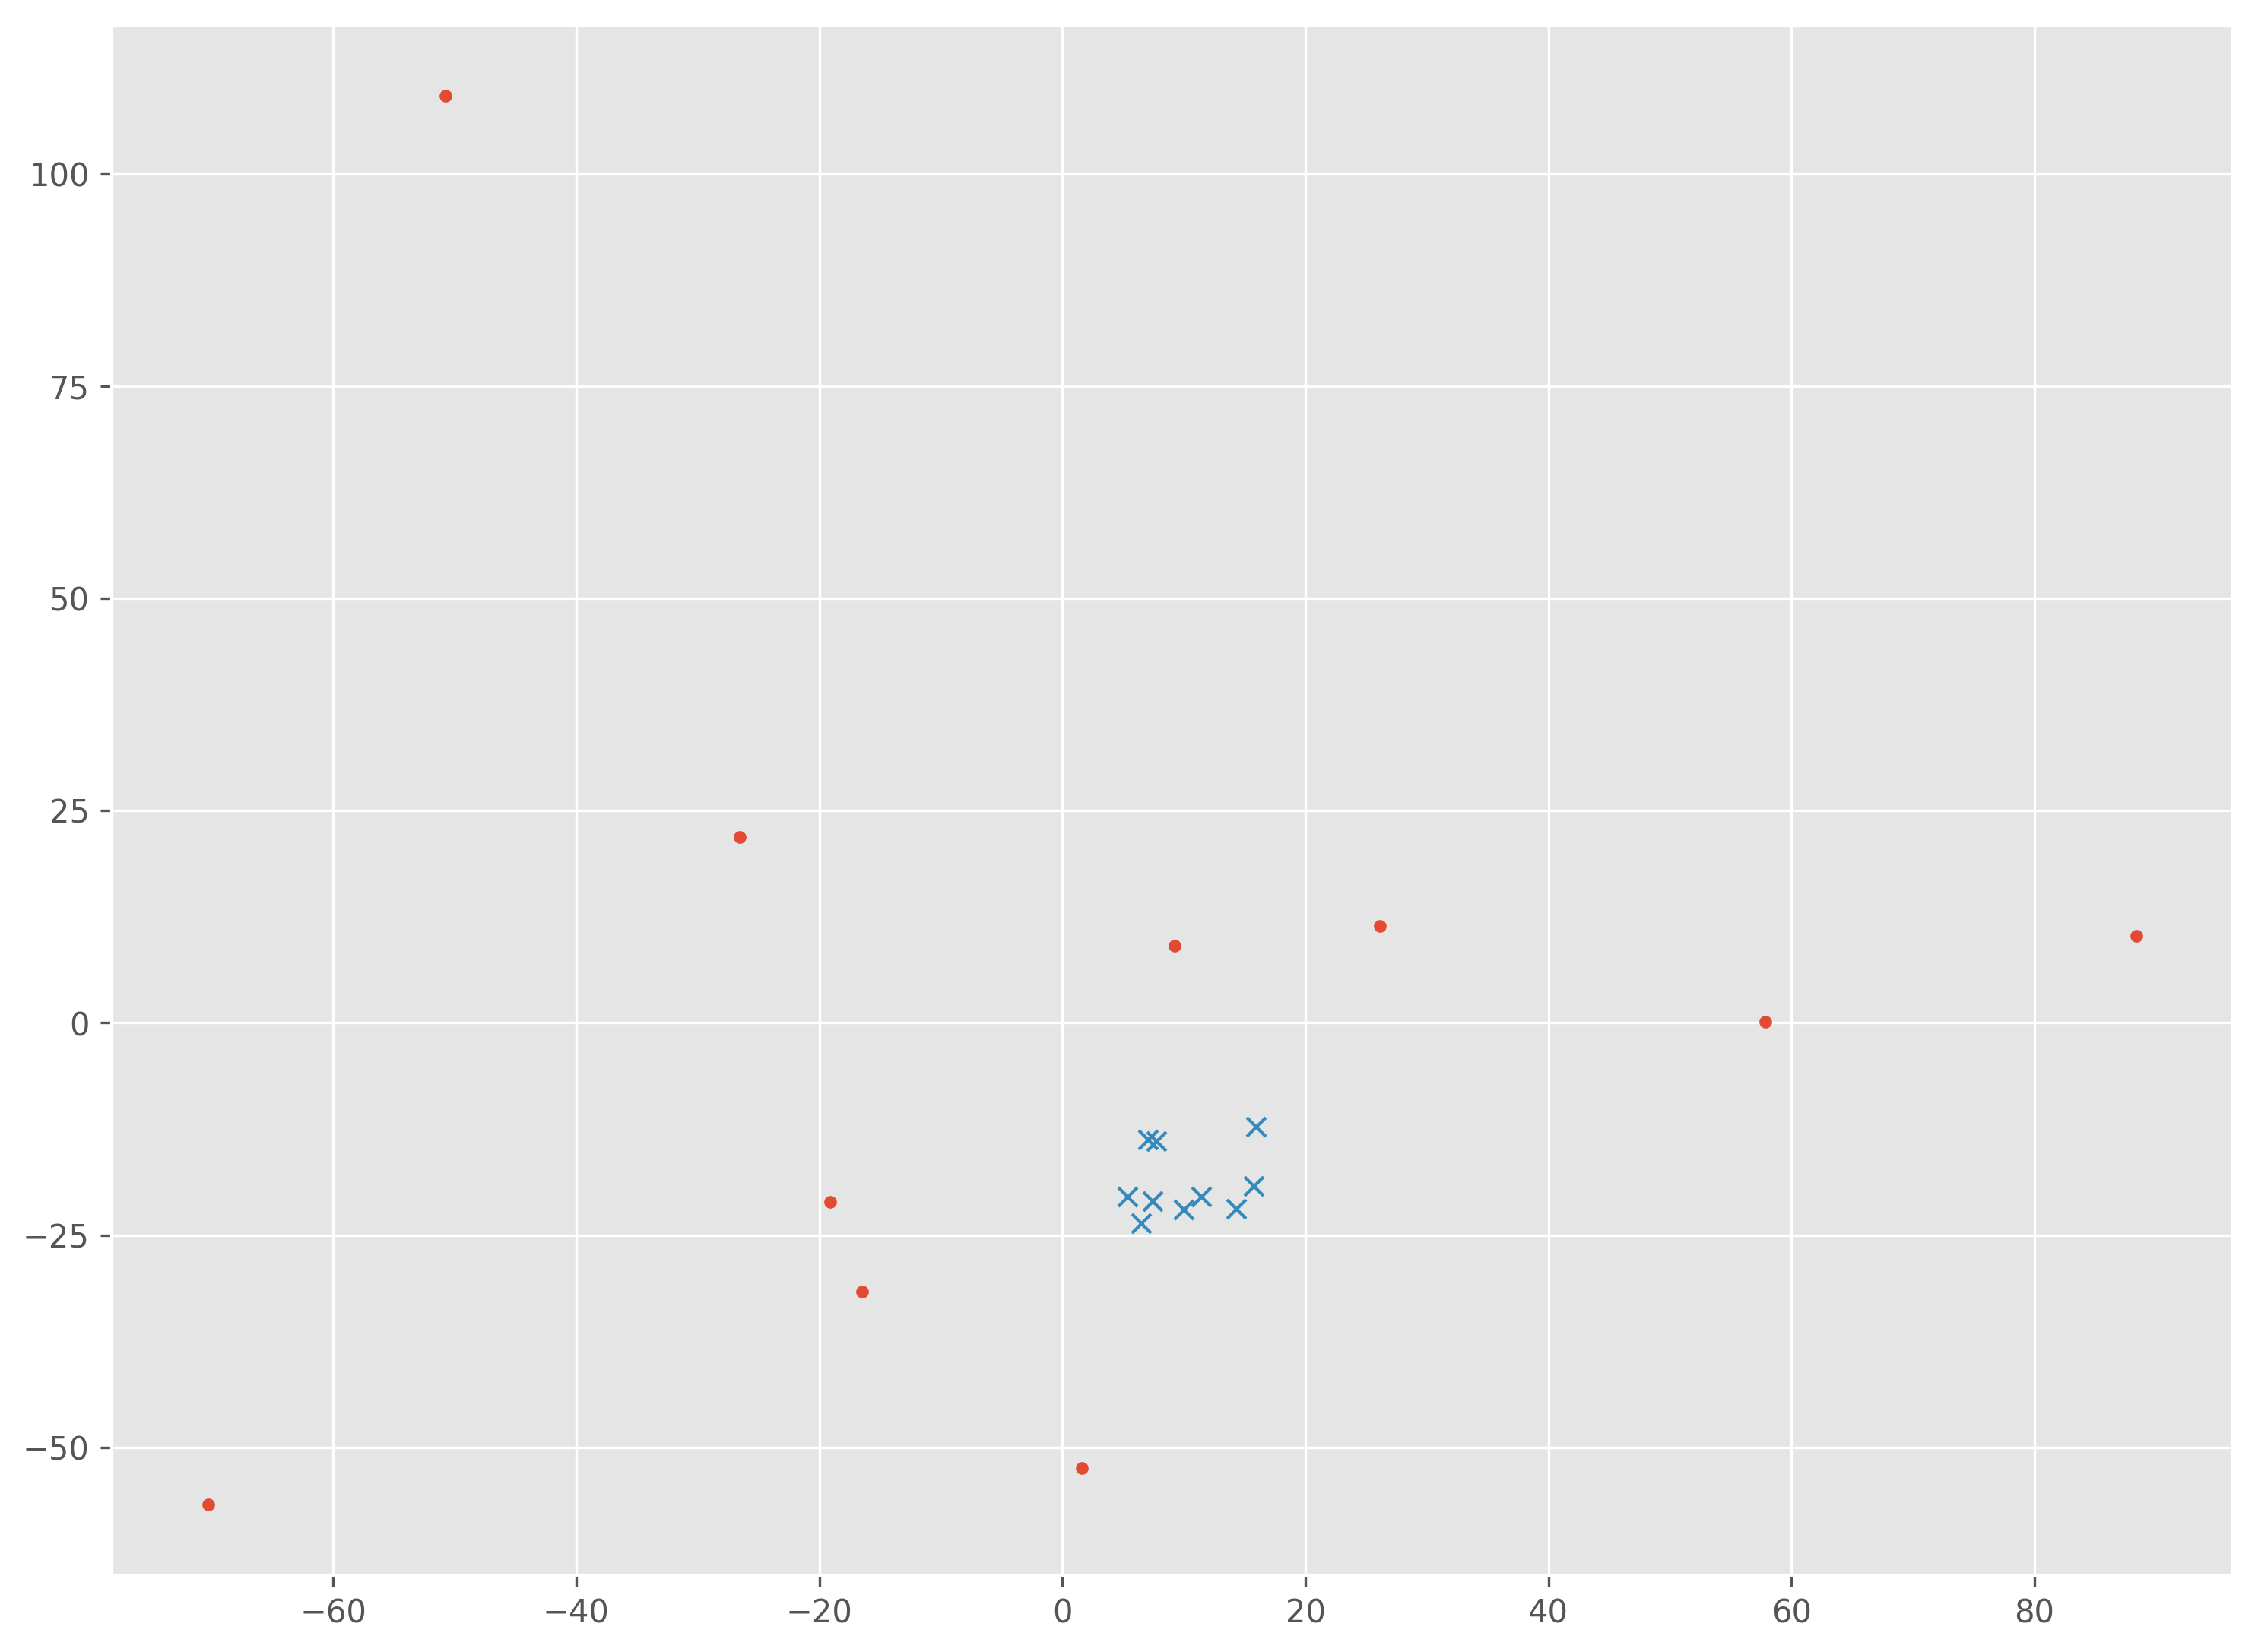

In [41]:
# apply PCA on x, with cov of org-data
org=[load_sf_from_file(0,0,i,1100,1350,50) for i in range(trial_number)]
opc=PCA(org,2,'org_cov.txt')

x=sf_generator(a, 1.0*d, 10)
xc=CAby(x.T, loadtxt('org_cov.txt'), 2)
plot(opc[:,0], opc[:,1], '.'); 
plot(xc[:,0], xc[:,1], 'x');
show()

((10, 830), (10, 830), (20, 830))


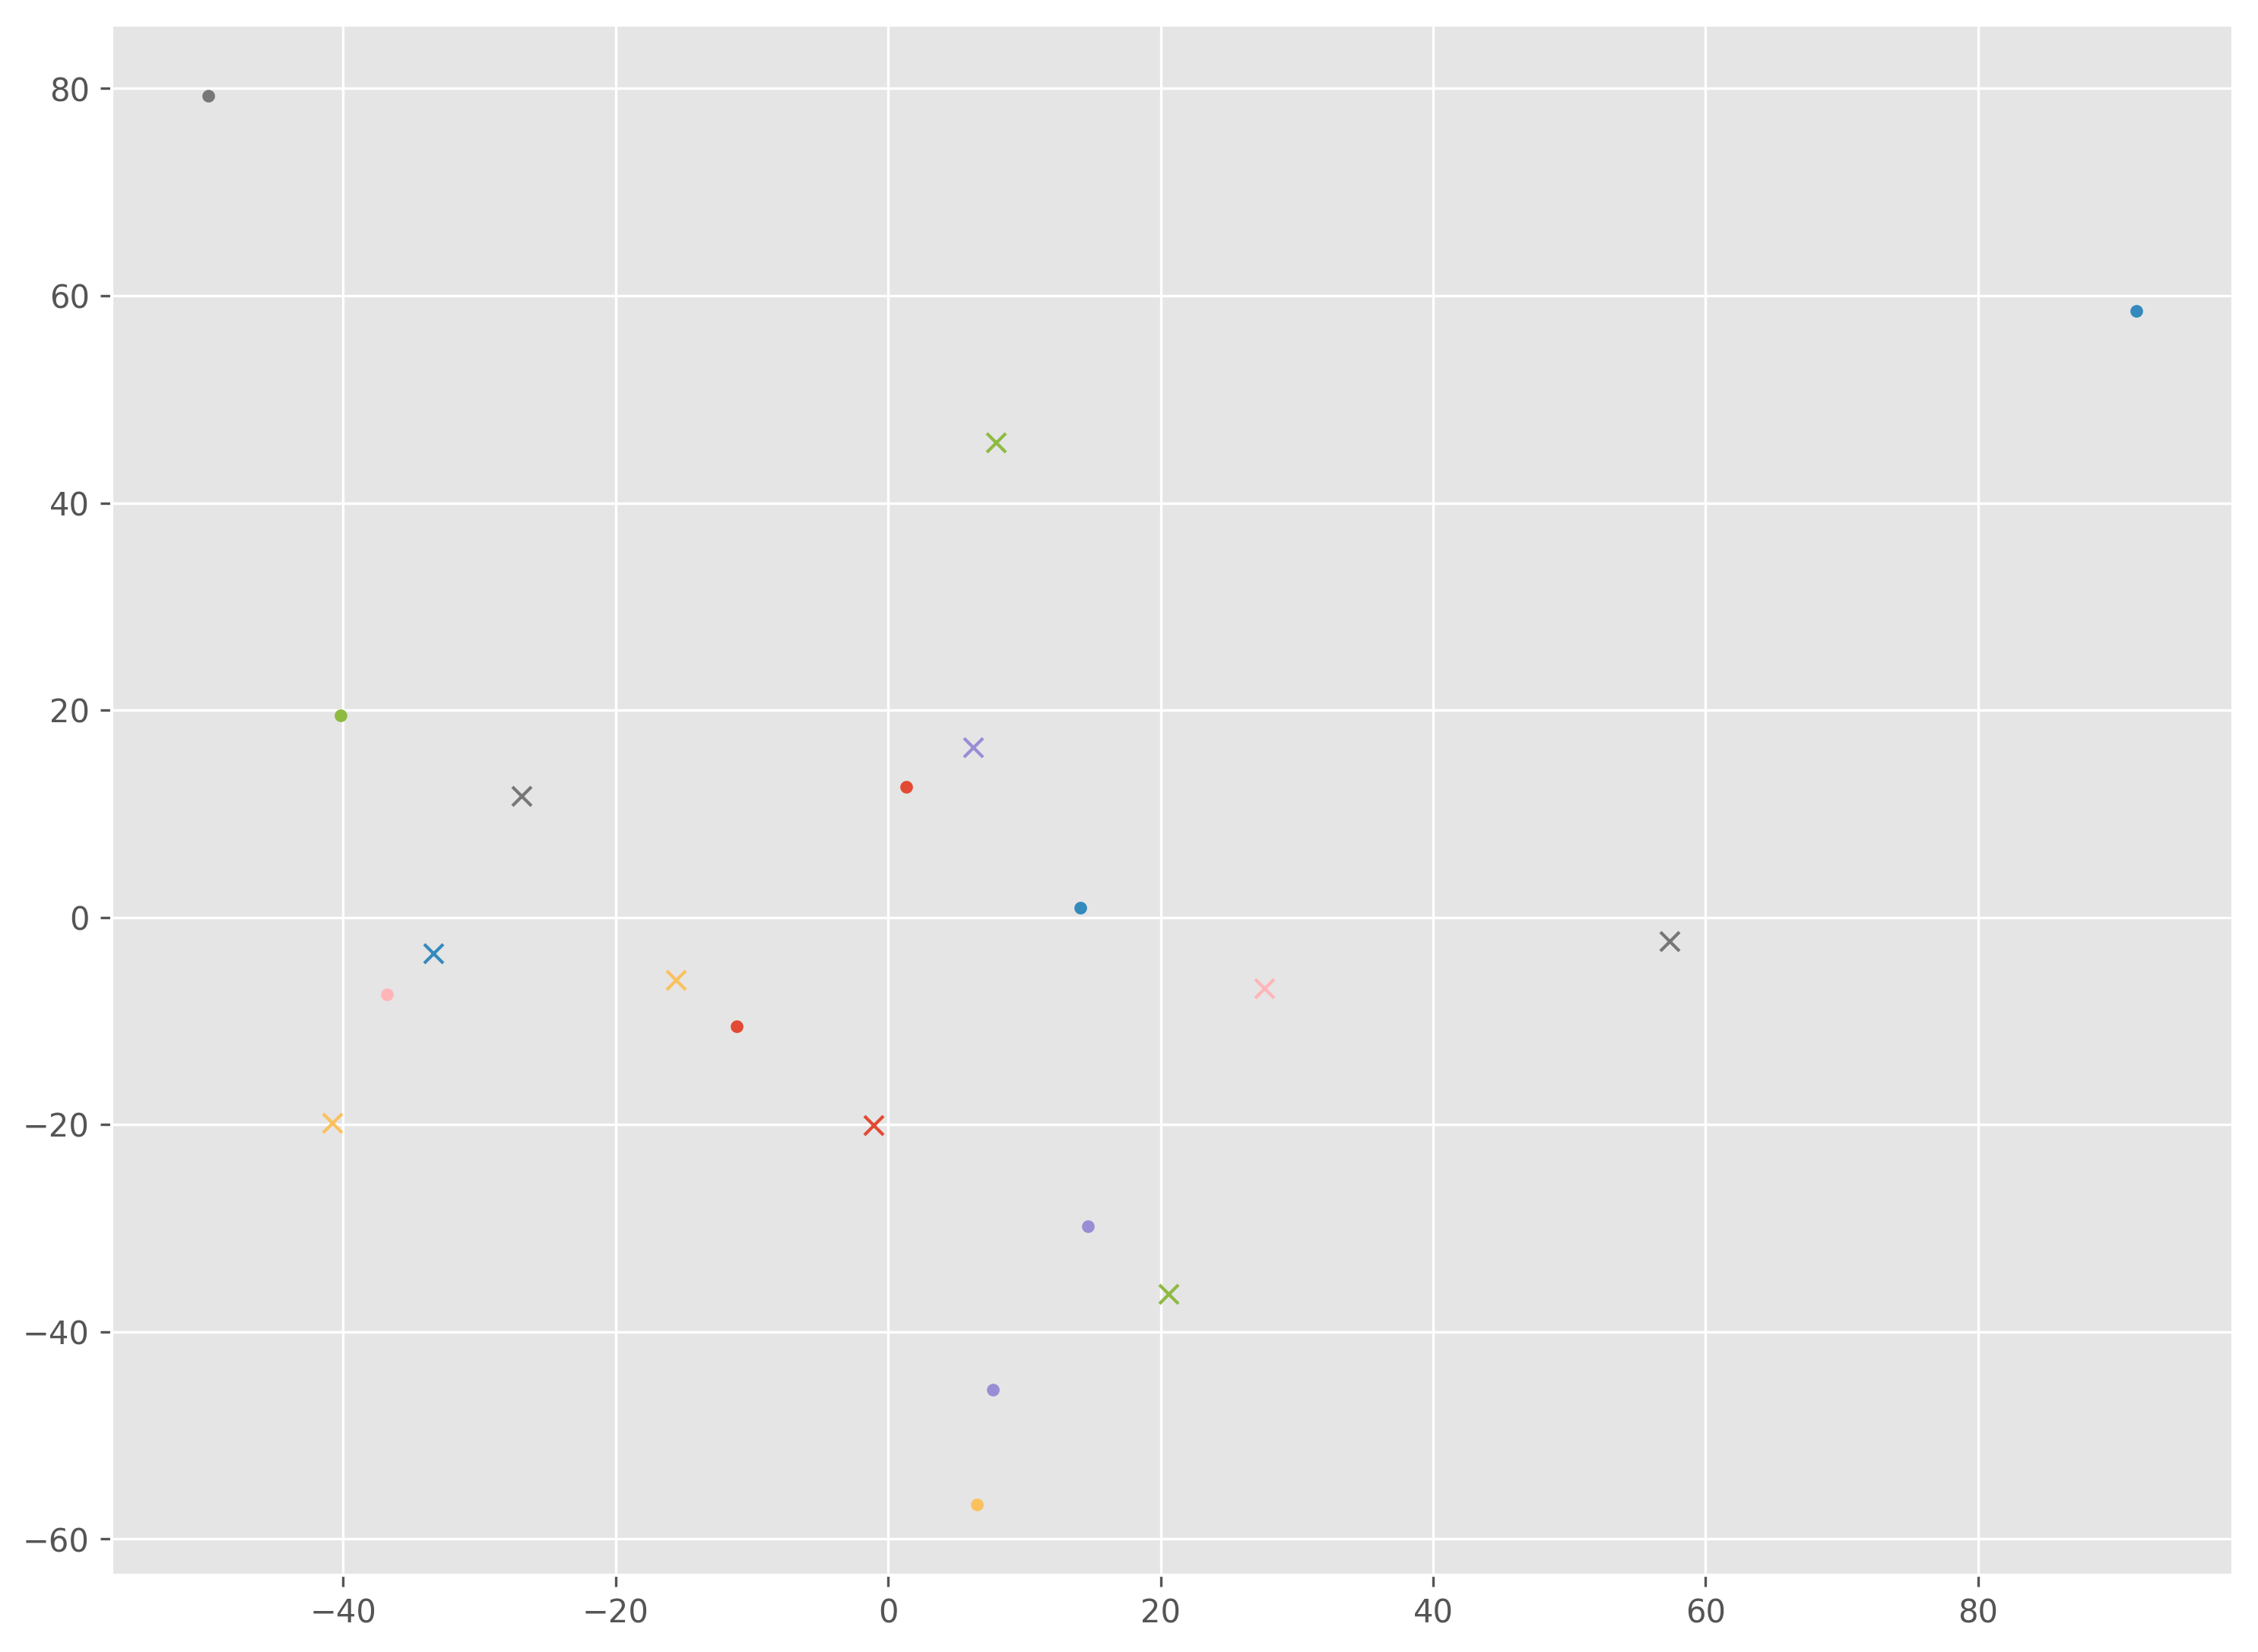

In [69]:
# merge x and org togther, then do PCA
org=array([load_sf_from_file(0,0,i,1100,1350,50) for i in range(trial_number)])
x=array(sf_generator(a, 1.0*d, 10)).T

aa=concatenate((org, x), axis=0)
print(shape(org),shape(x),shape(aa))
allpc=PCA(aa, 2)

for i in range(20):
  if i<10: plot(allpc[i,0], allpc[i,1], '.'); 
  else: plot(allpc[i,0], allpc[i,1], 'x'); 
show()

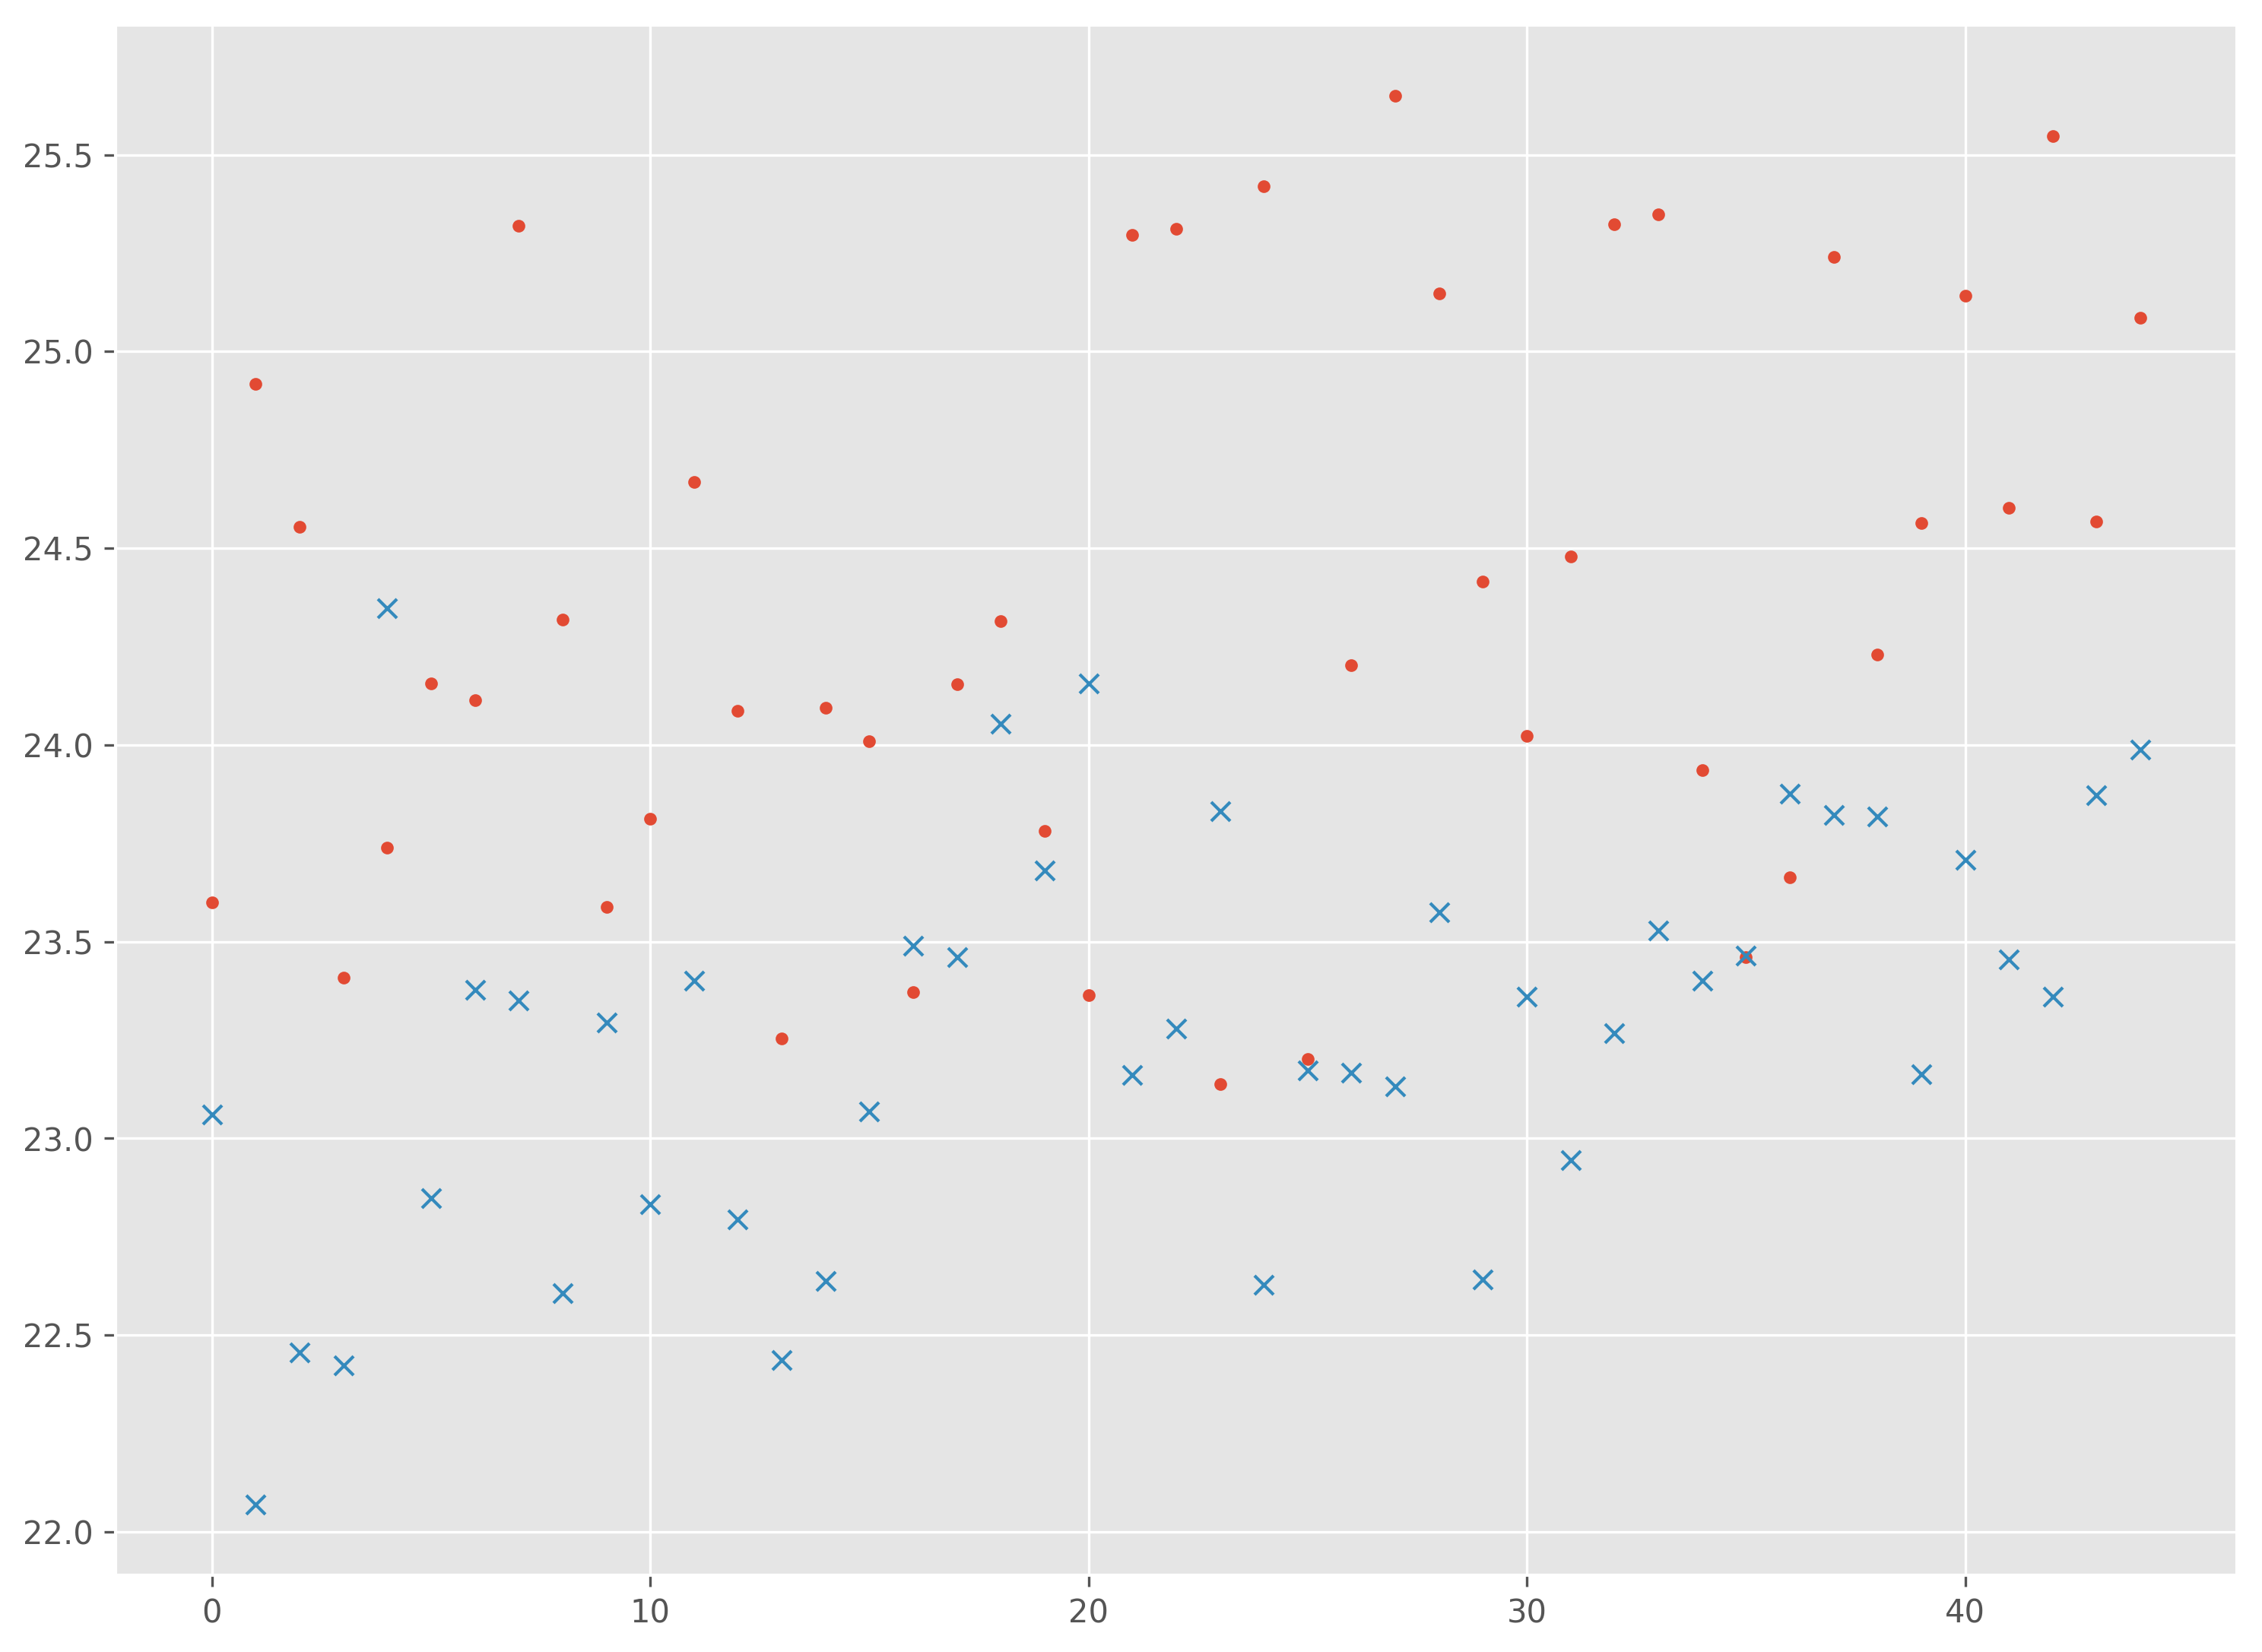

In [78]:
ttt = []
for i,j in muloop([10, 10]):
    if i>=j: continue
    ttt.append(iang(org[i], org[j]))
plot(ttt, '.');

ttt = []
for i,j in muloop([10, 10]):
    if i>=j: continue
    ttt.append(iang(x[i], x[j]))
plot(ttt, 'x');

show()

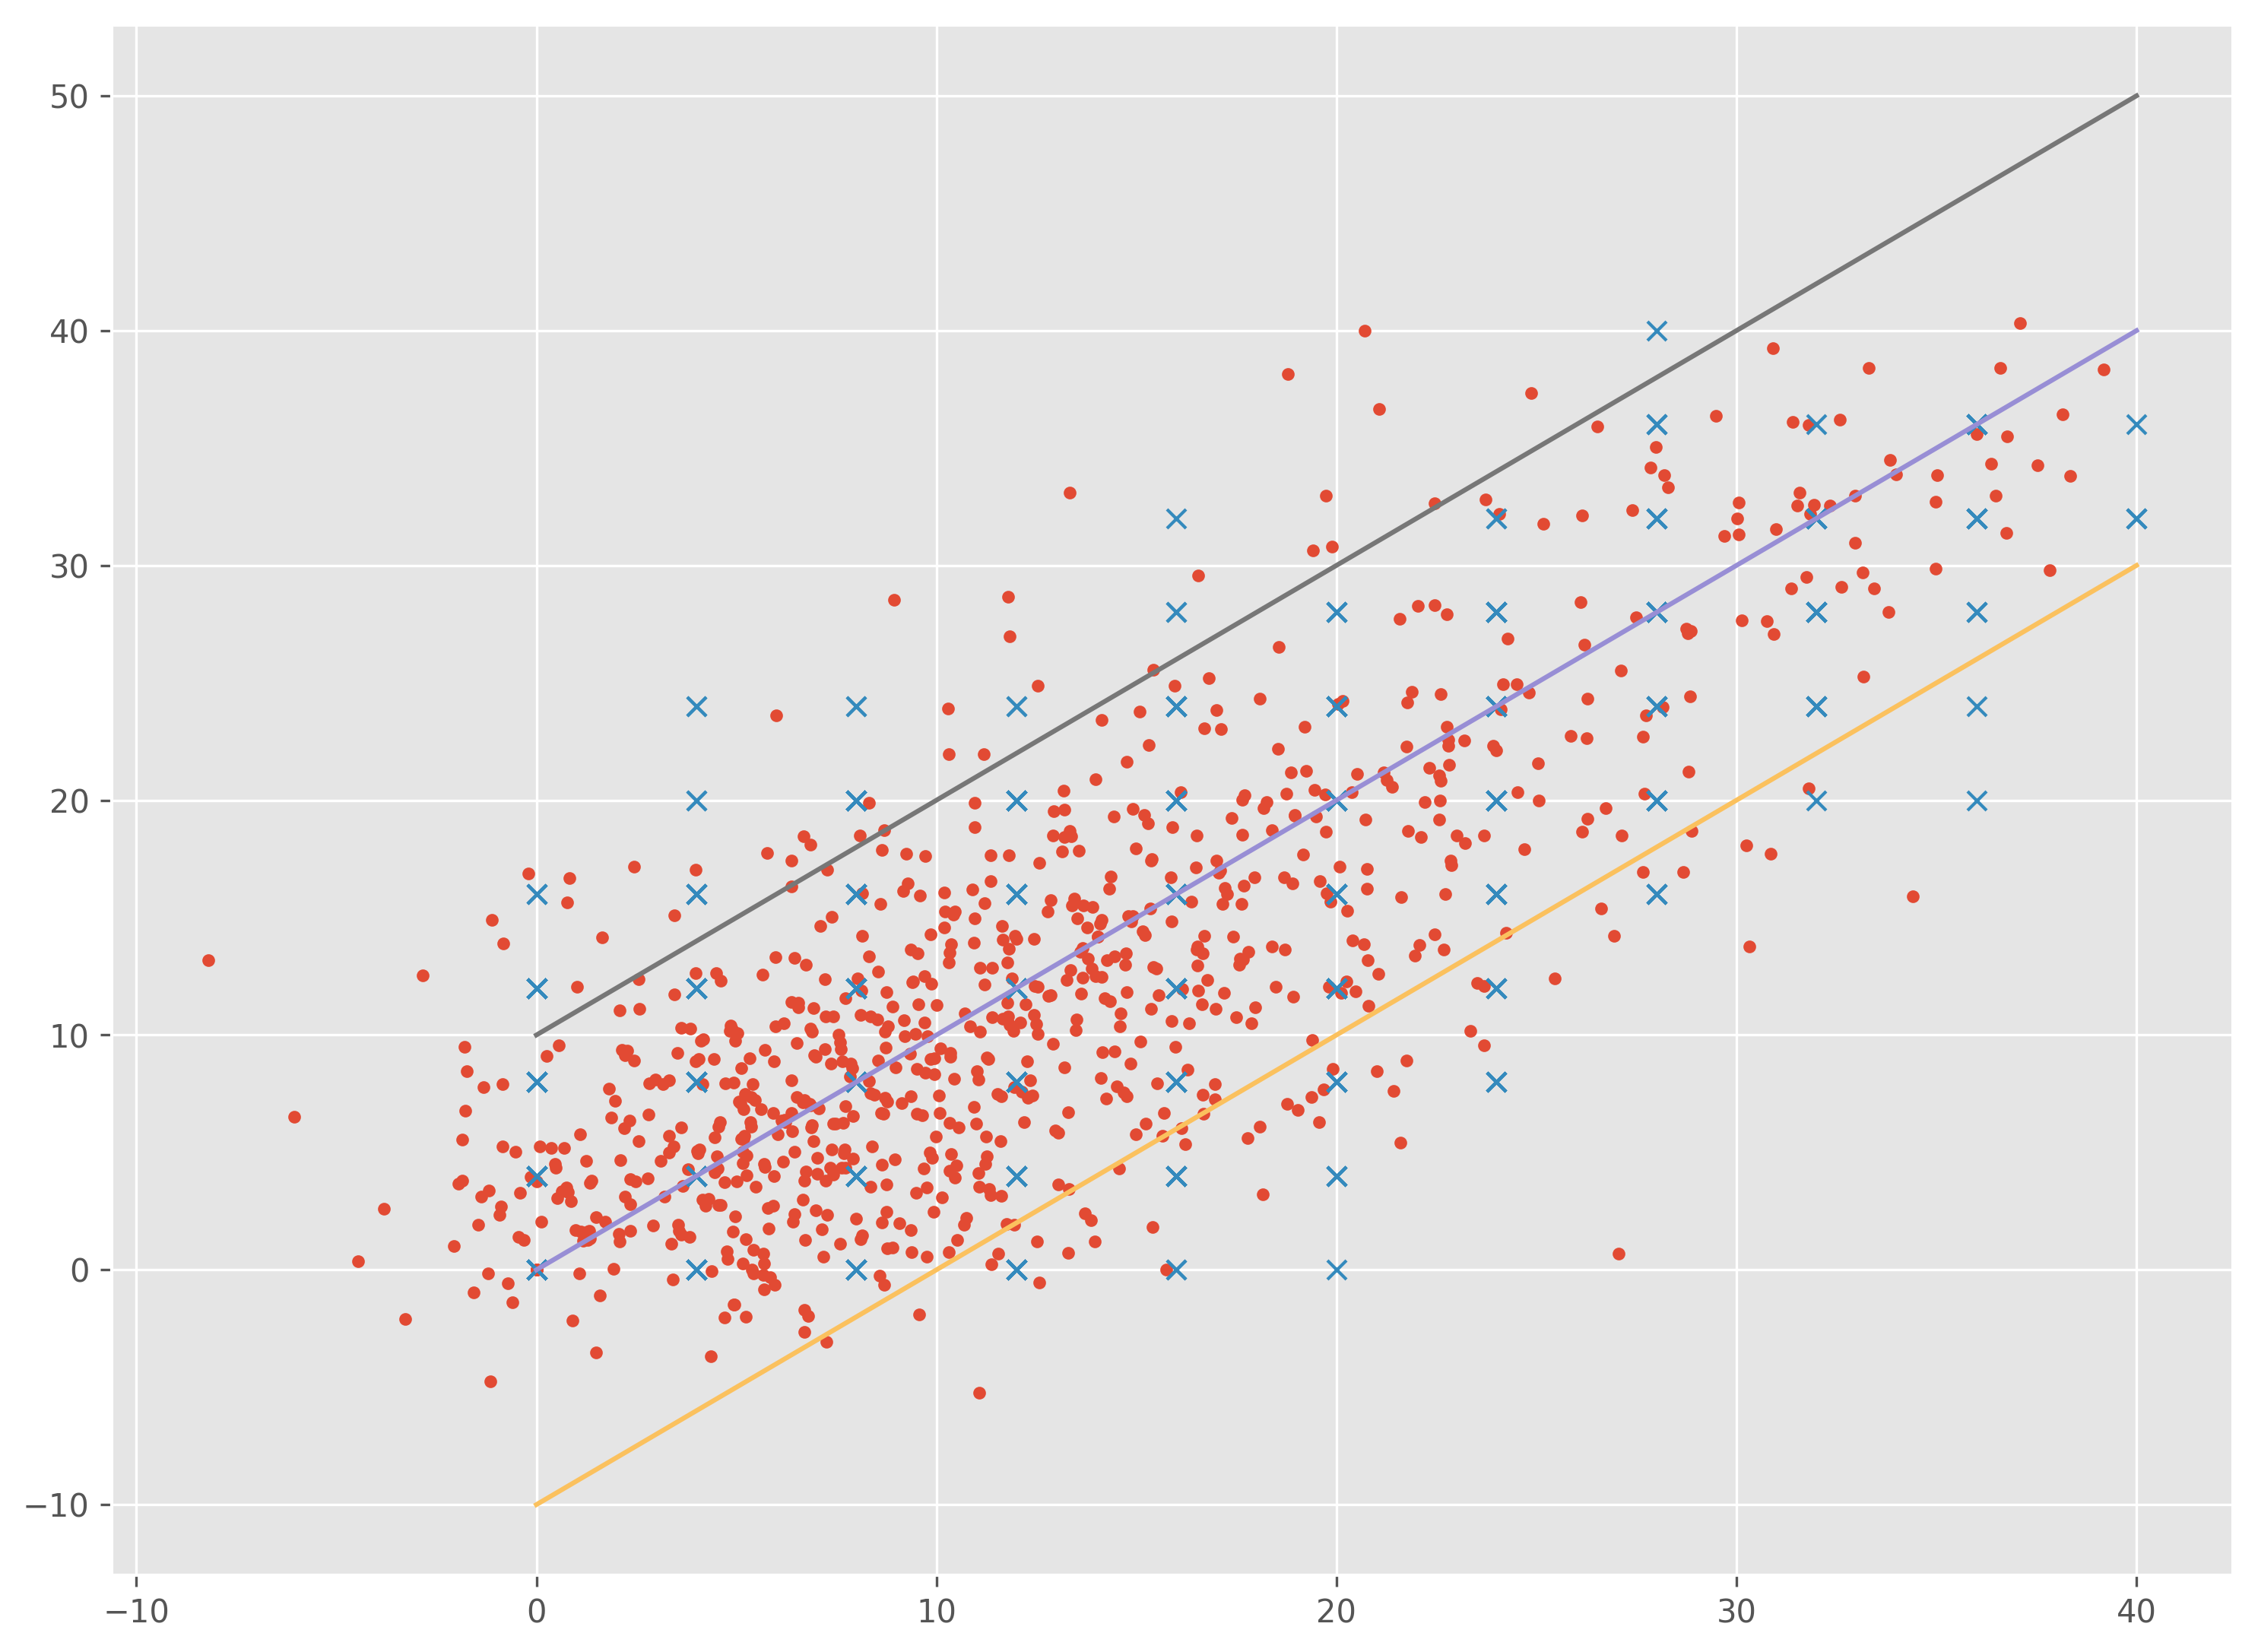

In [75]:
plot(x[0], x[1], '.');
plot(org[0], org[1], 'x');
fplot('y=x',[0,40])
fplot('y=x+10',[0,40])
fplot('y=x-10',[0,40])
show()

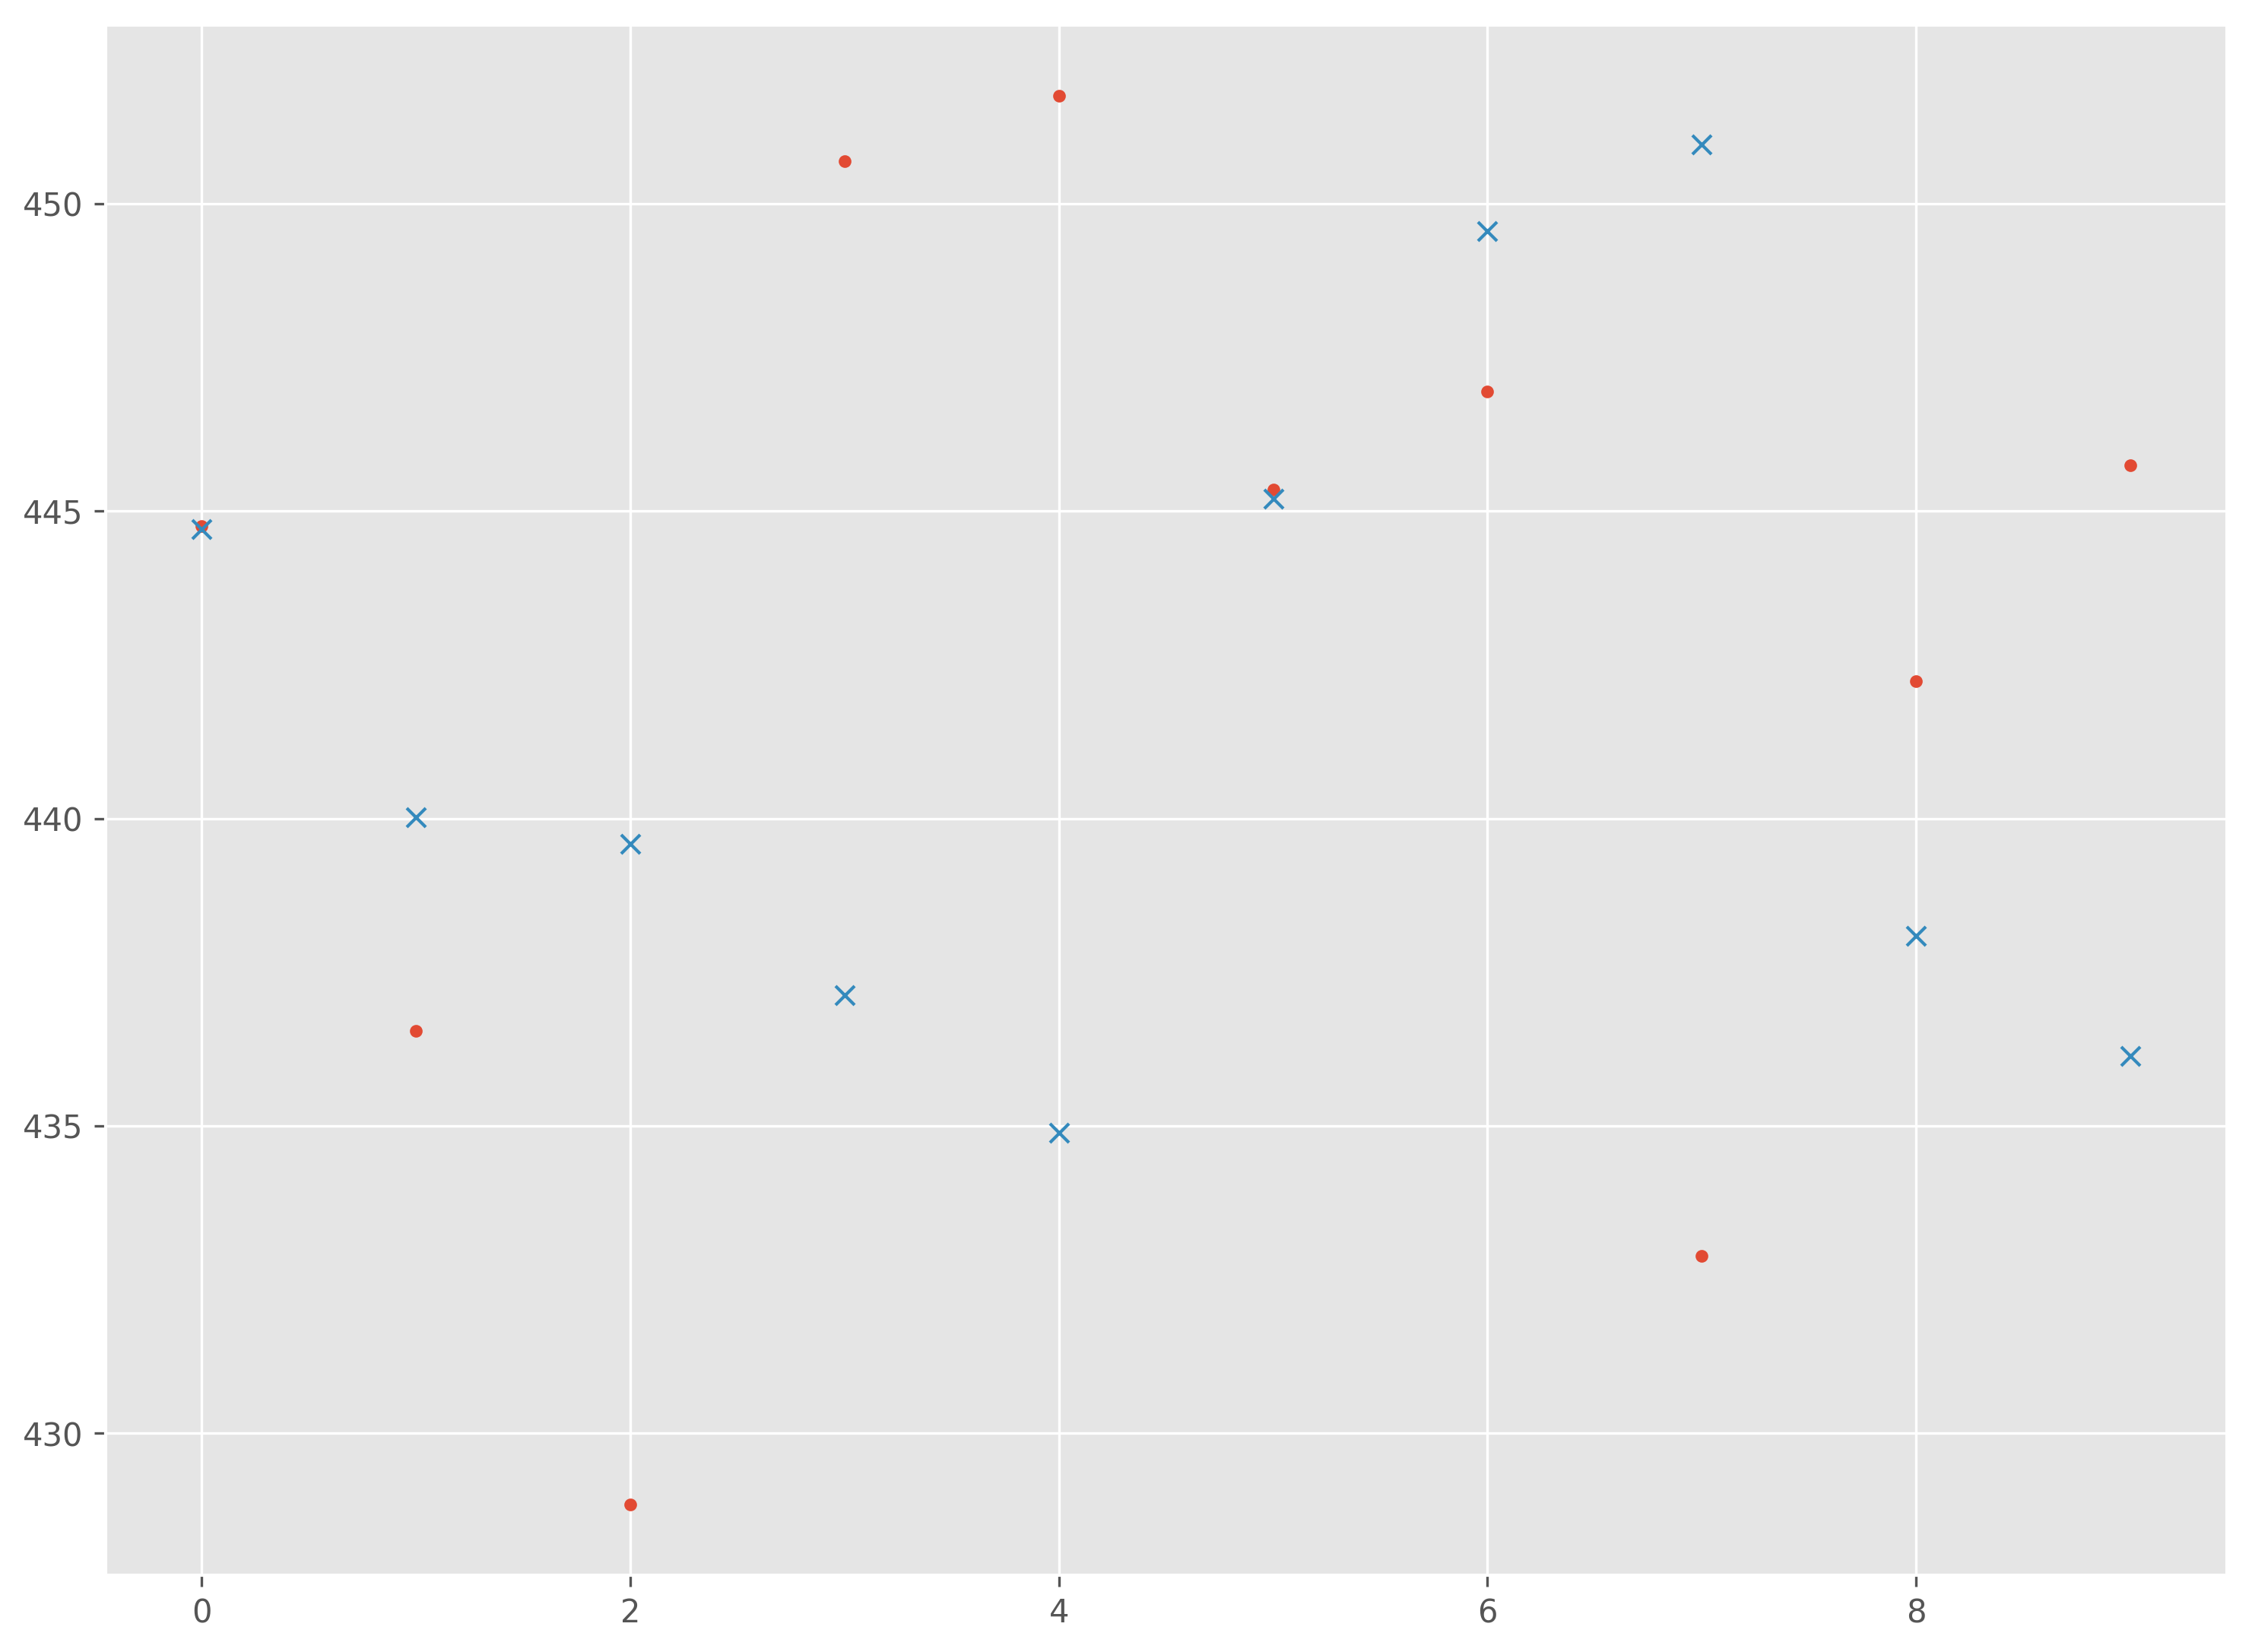

In [79]:
ttt = []
for i in range(10):
    ttt.append(norm(org[i]))
plot(ttt, '.');

ttt = []
for i in range(10):
    ttt.append(norm(x[i]))
plot(ttt, 'x');

show()